Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression ) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

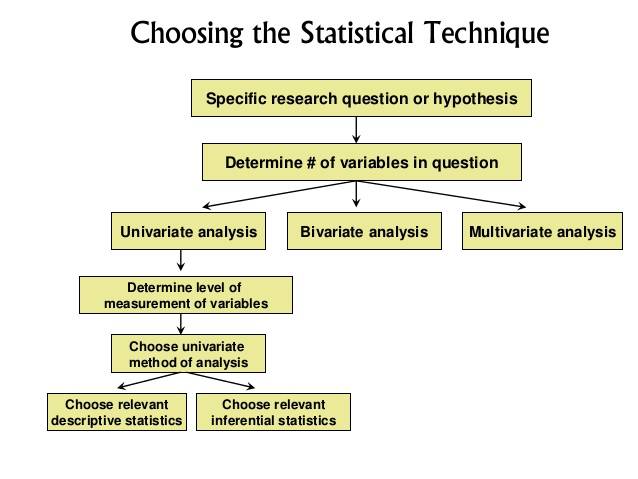

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
atheletes_df = pd.read_csv('athlete_events.csv')
regions_df = pd.read_csv('noc_regions.csv')

In [3]:
data_df = pd.merge(atheletes_df, regions_df, on='NOC', how='left')

In [4]:
data_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [5]:
data_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [6]:
data_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


ValueError: cannot convert float NaN to integer

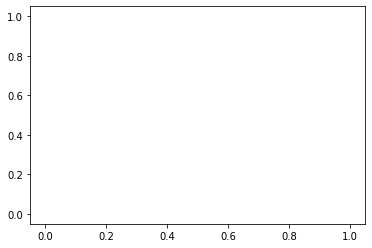

In [7]:
sns.distplot(data_df['Age'])

In [8]:
age_df = data_df['Age']

In [10]:
age_df = pd.to_numeric(data_df['Age'], errors='coerce')
age_df = age_df.dropna()
age_df = age_df.astype(int)


#errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
#If ‘raise’, then invalid parsing will raise an exception.

#If ‘coerce’, then invalid parsing will be set as NaN.

#If ‘ignore’, then invalid parsing will return the input.

In [11]:
age_df

0         24
1         23
2         24
3         34
4         21
5         21
6         25
7         25
8         27
9         27
10        31
11        31
12        31
13        31
14        33
15        33
16        33
17        33
18        31
19        31
20        31
21        31
22        33
23        33
24        33
25        33
26        18
27        18
28        26
29        26
          ..
271086    23
271087    19
271088    19
271089    34
271090    38
271091    32
271092    21
271093    21
271094    25
271095    25
271096    29
271097    29
271098    33
271099    36
271100    26
271101    24
271102    19
271103    23
271104    22
271105    23
271106    27
271107    21
271108    24
271109    28
271110    33
271111    29
271112    27
271113    27
271114    30
271115    34
Name: Age, Length: 261642, dtype: int32

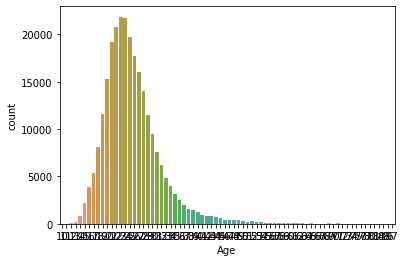

In [12]:
sns.countplot(age_df)

In [13]:
data_df.loc[data_df['Medal'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN


In [14]:
medalists_df = data_df.loc[~data_df['Medal'].isnull()]

In [15]:
medalists_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [16]:
def plot_column(my_df, col, chart_type='Histogram', dtype=int,
               bin_size=25):
    temp_df = pd.to_numeric(my_df[col], errors='coerce')
    temp_df = temp_df.dropna()
    temp_df = temp_df.astype(dtype)
    if chart_type=='Histogram':
        ax = sns.countplot(temp_df)
    elif chart_type=='Density':
        ax = sns.distplot(temp_df)
    xmin, xmax = ax.get_xlim()
    ax.set_xticks(np.round(np.linspace(xmin, xmax, bin_size), 2))
    plt.tight_layout()
    plt.locator_params(axis='y', nbins=6)
    plt.show()

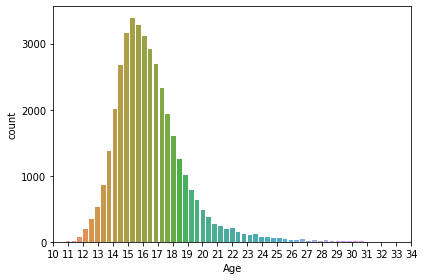

In [17]:
plot_column(medalists_df, 'Age')

### Calculate Skewness

Skewness is the measure of the asymmetry of an ideally symmetric probability distribution and is given by the third standardized moment. If that sounds way too complex, don’t worry! Let me break it down for you.

In simple words, skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution. Now, you might be thinking – why am I talking about normal distribution here?

Well, the normal distribution is the probability distribution without any skewness. You can look at the image below which shows symmetrical distribution that’s basically a normal distribution and you can see that it is symmetrical on both sides of the dashed line. Apart from this, there are two types of skewness:

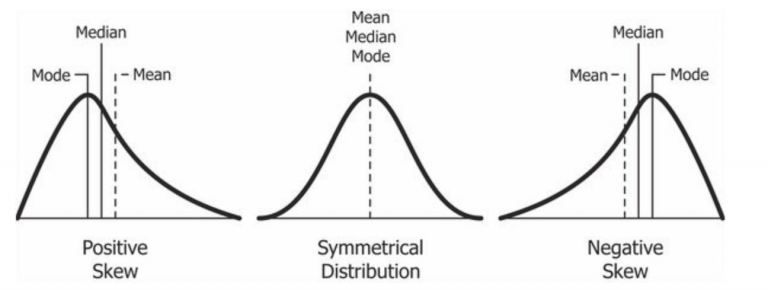


### Why is Skewness Important?
Now, we know that the skewness is the measure of asymmetry and its types are distinguished by the side on which the tail of probability distribution lies. But why is knowing the skewness of the data important?

First, linear models work on the assumption that the distribution of the independent variable and the target variable are similar. Therefore, knowing about the skewness of data helps us in creating better linear models.

In [25]:
from scipy.stats import skew
age_df = pd.to_numeric(medalists_df['Age'], errors='coerce')
age_df = age_df.dropna()
age_df = age_df.astype(int)
print("Skewness is {}".format(skew(age_df)))
print("Mean is {}".format(np.mean(age_df)))
print("Median is {}".format(np.median(age_df)))

Skewness is 1.497531959387686
Mean is 25.925174771452717
Median is 25.0


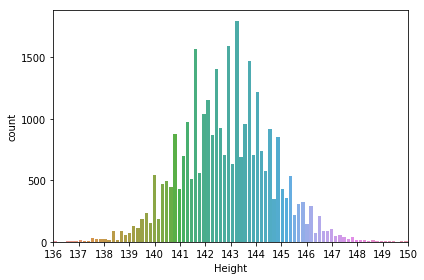

In [26]:
plot_column(medalists_df, 'Height', bin_size=15)

In [28]:
Height_df = pd.to_numeric(medalists_df['Height'], errors='coerce')
Height_df = Height_df.dropna()
Height_df = Height_df.astype(int)
print("Skewness is {}".format(skew(Height_df)))
print("Mean is {}".format(np.mean(Height_df)))
print("Median is {}".format(np.median(Height_df)))

Skewness is 0.046825246979302765
Mean is 177.55419670442842
Median is 178.0


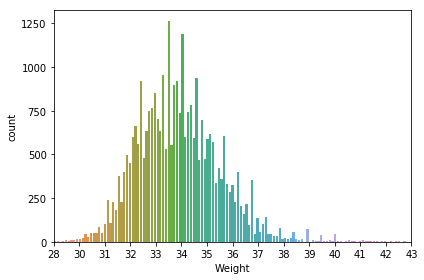

In [29]:
plot_column(medalists_df, 'Weight', bin_size=15)

In [31]:
Weight_df = pd.to_numeric(medalists_df['Weight'], errors='coerce')
Weight_df = Weight_df.dropna()
Weight_df = Weight_df.astype(int)
print("Skewness is {}".format(skew(Weight_df)))
print("Mean is {}".format(np.mean(Weight_df)))
print("Median is {}".format(np.median(Weight_df)))

Skewness is 0.6921002780813605
Mean is 73.76723798266352
Median is 73.0


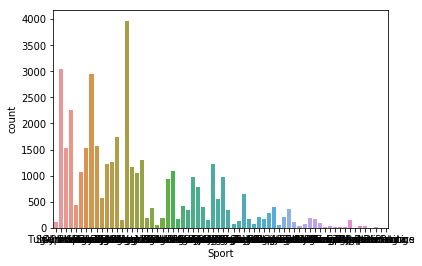

In [32]:
sports_df = medalists_df[~medalists_df['Sport'].isnull()]
sns.countplot(medalists_df['Sport'])

In [ ]:
sum(medalists_df['Sport'].isnull())

In [33]:
sports_count=medalists_df['Sport'].value_counts().nlargest(25).to_frame()

In [34]:
#sports_count.reset_index(inplace=True)
print(sports_count)


                      Sport
Athletics              3969
Swimming               3048
Rowing                 2945
Gymnastics             2256
Fencing                1743
Football               1571
Ice Hockey             1530
Hockey                 1528
Wrestling              1296
Cycling                1263
Sailing                1232
Shooting               1228
Canoeing               1165
Basketball             1080
Handball               1060
Water Polo             1057
Volleyball              969
Equestrianism           965
Boxing                  944
Cross Country Skiing    776
Weightlifting           646
Speed Skating           580
Judo                    547
Alpine Skiing           428
Diving                  427


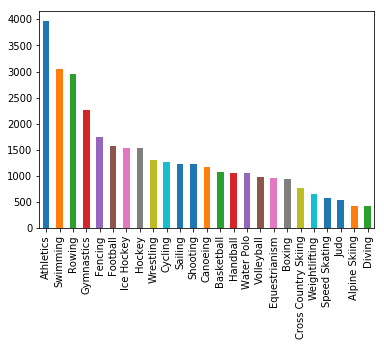

In [35]:
ax = sports_count.plot.bar(y='Sport')
ax.get_legend().remove()

In [36]:
year_count_df=data_df['Year'].value_counts().to_frame()

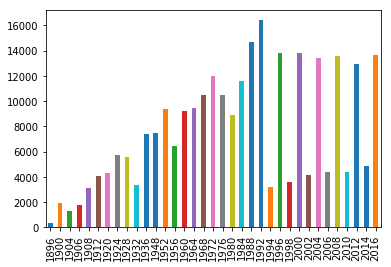

In [37]:
year_count_df.sort_index(inplace=True)
ax = year_count_df.plot.bar(y='Year')
ax.get_legend().remove()